Pandas함수 정리: https://gaga.tistory.com/150

folium 사용가이드: https://iridescent-zeal.tistory.com/184

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [155]:
# 코랩 폰트 깨짐 해결 ( plt.rc('font', family='NanumBarunGothic') )
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [156]:
file = r'/content/drive/MyDrive/실습/subway_raw.csv'
subway_raw = pd.read_csv(file)

In [157]:
subway_raw

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,화,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,화,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,화,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,화,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,화,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104
...,...,...,...,...,...,...,...,...,...,...
107023,2019-06-30,일,7호선,마들,6622.0,6116.0,12738.0,2019-06,06-30,20190703
107024,2019-06-30,일,4호선,노원,14071.0,14702.0,28773.0,2019-06,06-30,20190703
107025,2019-06-30,일,7호선,중계,9516.0,8981.0,18497.0,2019-06,06-30,20190703
107026,2019-06-30,일,7호선,하계,11645.0,11121.0,22766.0,2019-06,06-30,20190703


In [158]:
subway_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   사용일자     107028 non-null  object 
 1   요일       107028 non-null  object 
 2   노선명      107028 non-null  object 
 3   역명       107028 non-null  object 
 4   승차총승객수   107028 non-null  float64
 5   하차총승객수   107028 non-null  float64
 6   승하차총승객수  107028 non-null  float64
 7   연월       107028 non-null  object 
 8   월일       107028 non-null  object 
 9   등록일자     107028 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 8.2+ MB


<h1>Q) 2019.01~06 중 언제 지하철을 가장 많이 이용했을까? (기준: 승하차승객수)</h1>

In [159]:
# 가설1) 1월~6월 중 5월에 지하철 승객수가 많다
group_month=subway_raw.groupby('연월')\
                    .agg(월별_승하차총승객수=('승하차총승객수','sum'))
group_month

,월별_승하차총승객수
연월,
2019-01,442746389.0
2019-02,379836010.0
2019-03,466692826.0
2019-04,470934348.0
2019-05,485718557.0
2019-06,442210635.0


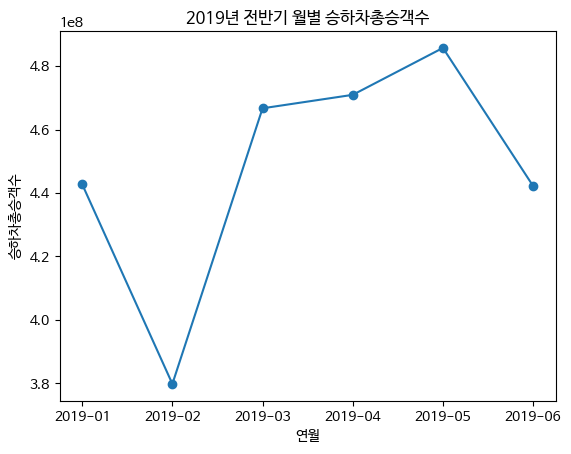

In [160]:
plt.figure()
plt.rc('font', family='NanumBarunGothic')
plt.scatter(group_month.index, group_month.values)
plt.plot(group_month.index, group_month.values)
plt.xlabel('연월')
plt.ylabel('승하차총승객수')
plt.title('2019년 전반기 월별 승하차총승객수')
plt.show()


In [161]:
# 가설2) 요일중에서 목요일에 지하철 승객수가 많다
group_day=subway_raw.groupby('요일')\
                    .agg(요일별_승하차총승객수 = ('승하차총승객수','sum'))

group_day

,요일별_승하차총승객수
요일,
금,445310717.0
목,428684383.0
수,421134136.0
월,391555551.0
일,247523995.0
토,341950018.0
화,411979965.0


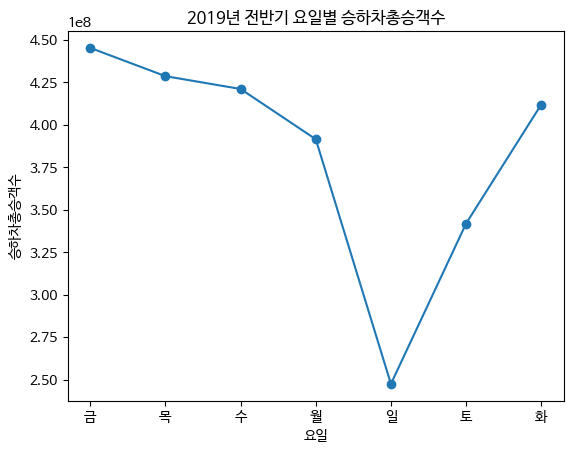

In [162]:
plt.figure()
plt.rc('font', family='NanumBarunGothic')
plt.scatter(group_day.index, group_day.values)
plt.plot(group_day.index, group_day.values)
plt.xlabel('요일')
plt.ylabel('승하차총승객수')
plt.title('2019년 전반기 요일별 승하차총승객수')
plt.show()

<h1>Q) 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프 그려볼까요? (pointplot))</h1>

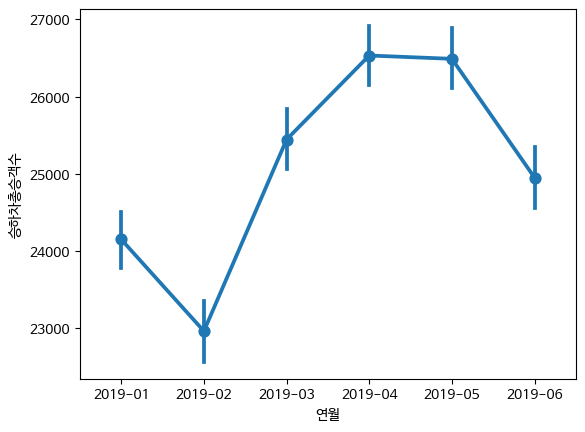

In [163]:
plt.figure()
sns.pointplot(subway_raw,x='연월',y='승하차총승객수')
plt.show()

<h1>Q) 가장 승객이 많이 타는 승차역은?</h1>

In [164]:
group_station=subway_raw.groupby('역명')\
              .agg(역별_승차총승객수=('승차총승객수','sum'))\
              .sort_values('역별_승차총승객수', ascending=False)
group_station

,역별_승차총승객수
역명,
잠실,18574323.0
강남,18148024.0
고속터미널,17541287.0
홍대입구,17270084.0
서울역,17165598.0
...,...
신원,43013.0
백양리,34193.0
굴봉산,34051.0


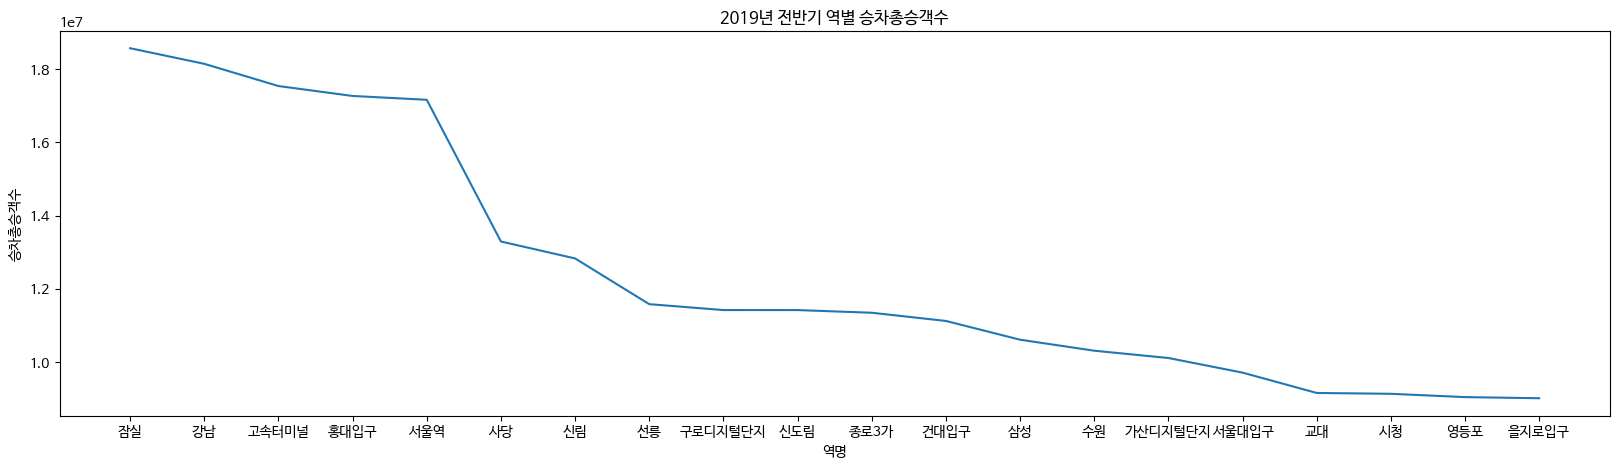

In [165]:
# 상위 20개 역만 확인
plt_station=group_station.head(20)

plt.figure(figsize=(20,5))
plt.rc('font', family='NanumBarunGothic')
plt.plot(plt_station)
plt.xlabel('역명')
plt.ylabel('승차총승객수')
plt.title('2019년 전반기 역별 승차총승객수')
plt.show()

<h1>Q) 노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선,역별/요일별 heatmap)</h1>

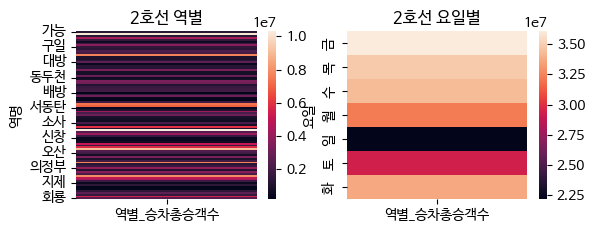

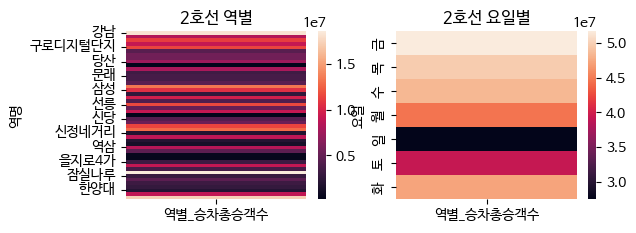

In [166]:
# 1호선 역별
group_station_1=subway_raw.query('노선명=="1호선"')\
                          .groupby('역명')\
                          .agg(역별_승차총승객수=('승차총승객수','sum'))
# 1호선 요일별
group_day_1=subway_raw.query('노선명=="1호선"')\
                          .groupby('요일')\
                          .agg(역별_승차총승객수=('승차총승객수','sum'))
plt.subplot(2,2,1)
plt.title('2호선 역별')
sns.heatmap(group_station_1)
plt.subplot(2,2,2)
plt.title('2호선 요일별')
sns.heatmap(group_day_1)
plt.show()

# 2호선 역별
group_station_2=subway_raw.query('노선명=="2호선"')\
                          .groupby('역명')\
                          .agg(역별_승차총승객수=('승차총승객수','sum'))
# 2호선 요일별
group_day_2=subway_raw.query('노선명=="2호선"')\
                          .groupby('요일')\
                          .agg(역별_승차총승객수=('승차총승객수','sum'))
plt.subplot(2,2,3)
plt.title('2호선 역별')
sns.heatmap(group_station_2)
plt.subplot(2,2,4)
plt.title('2호선 요일별')
sns.heatmap(group_day_2)
plt.show()

<h1>Q) 1호선에서 가장 하차를 많이하는 역은? (groupby)</h1>

In [167]:
group_station_1=subway_raw.query('노선명=="1호선"')\
                            .groupby('역명')\
                            .agg(역별_하차총승객수=('하차총승객수','sum'))\
                            .sort_values('역별_하차총승객수', ascending=False)
group_station_1
# 상위 20개 역만 확인
plt_station_1=group_station_1.head(20)
plt_station_1

,역별_하차총승객수
역명,
가산디지털단지,10571381.0
수원,10226609.0
영등포,9432067.0
용산,7817685.0
노량진,7603258.0
부평,7531774.0
종각,7517515.0
부천,7412269.0
송내,5807791.0


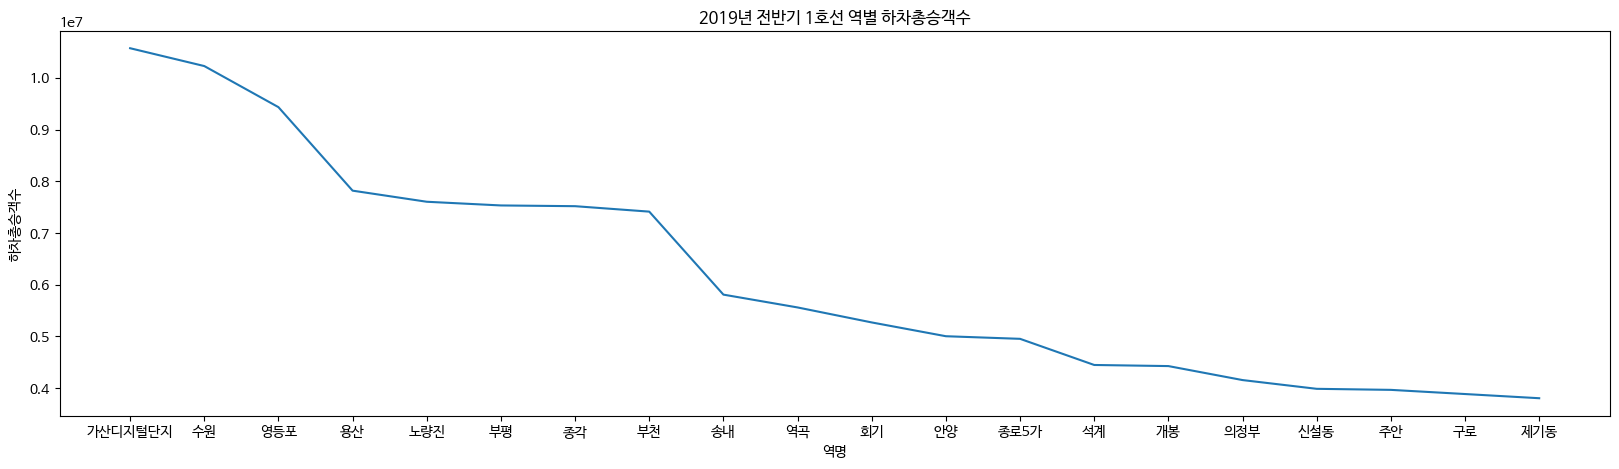

In [168]:
# 상위 20개 역만 확인
plt_station_1=group_station_1.head(20)

plt.figure(figsize=(20,5))
plt.rc('font', family='NanumBarunGothic')
plt.plot(plt_station_1.index, plt_station_1.values)
plt.xlabel('역명')
plt.ylabel('하차총승객수')
plt.title('2019년 전반기 1호선 역별 하차총승객수')
plt.show()

<h1>Q) 2호선 중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium역 표시)</h1>

In [169]:
file1 = r'/content/drive/MyDrive/실습/지하철노선위경도정보2.csv'
subway_geo_raw = pd.read_csv(file1)

In [170]:
subway_geo_2=subway_geo_raw.query('호선=="2호선" and 역지역=="수도권"')\
                            .reset_index(drop=True)
subway_geo_2.rename(columns={'역이름':'역명'}, inplace=True)
subway_geo_2.head(3)

,역명,역지역,위도,경도,호선
0,낙성대,수도권,37.477090,126.963506,2호선
1,서울대입구,수도권,37.481285,126.952695,2호선
2,강변,수도권,37.535118,127.094723,2호선


In [171]:
group_station_2=subway_raw.query('노선명=="2호선"')\
                            .groupby('역명',as_index = False)\
                            .agg(역별_승차총승객수=('승차총승객수', 'sum'))\
                            .reset_index(drop=True)
group_station_2.head(3)

,역명,역별_승차총승객수
0,강남,18148024.0
1,강변,8267462.0
2,건대입구,11123655.0


In [172]:
merge_outer=pd.merge(subway_geo_2, group_station_2, how='outer', on='역명')\
                  .sort_values('역별_승차총승객수', ascending=False)
max_station=merge_outer.head(1)
max_station

,역명,역지역,위도,경도,호선,역별_승차총승객수
41,잠실,수도권,37.513309,127.100215,2호선,18574323.0


In [173]:
myMap = folium.Map(location=[max_station['위도'], max_station['경도']], zoom_start=12)

folium.Marker([max_station['위도'], max_station['경도']],
  popup="max_station['역명']",
  tooltip="max_station['역명']",
  icon=folium.Icon(color='red', icon='star')).add_to(myMap)

myMap.save('/content/drive/MyDrive/실습/max_from_line2.html')